In [1]:
from math import ceil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import time
from torchvision import models

In [2]:
# Set device
#########################################################################change this##############################################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
labels_map = {
      0: "Bread",
      1: "Noodles-Pasta",
      2: "Soup",
}

In [3]:
print(device)

cuda


In [4]:
def displayImages(t_dataset):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(t_dataset), size=(1,)).item()
      img, label = t_dataset[sample_idx]
      img=np.array(img).transpose((1,2,0))
      figure.add_subplot(rows, cols, i)
      plt.title(labels_map[label])
      plt.axis("off")
      plt.imshow(img.squeeze())
    print("\n\n\n################################################\n\n\n")
    plt.show()

In [5]:
def data_loader(data_dir_input,batch_sizeGiven,input_size,flag=0):
# Define dataset directory and transforms
  data_dir = data_dir_input #
  #########################################################################change this##############################################################
  data_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
    transforms.RandomErasing()
  ])

  if flag==1:
    #print("Train Datset Size After Split",len(train_dataset))
    #print("Test Datset Size After Split",len(test_dataset))
    #print("Validation Datset Size After Split",len(val_dataset))
    print("Dataset Before Pre-Processing")
    test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'),transform=transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),   
  ]))
    displayImages(test_dataset)
    print("Dataset After Pre-Processing")
    test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'),transform=data_transform)
    displayImages(test_dataset)
    return  

# Define train, validation, and test dataset
  train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=data_transform)
  test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=data_transform)
  val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=data_transform)
  
  print("Train Datset Size After Split",len(train_dataset))
  print("Test Datset Size After Split",len(test_dataset))
  print("Validation Datset Size After Split",len(val_dataset))
  
  train_loader = DataLoader(train_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) #shuffle 
  val_loader = DataLoader(val_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) # shuffle working








  return train_loader,test_loader,val_loader
 

Dataset Before Pre-Processing



################################################





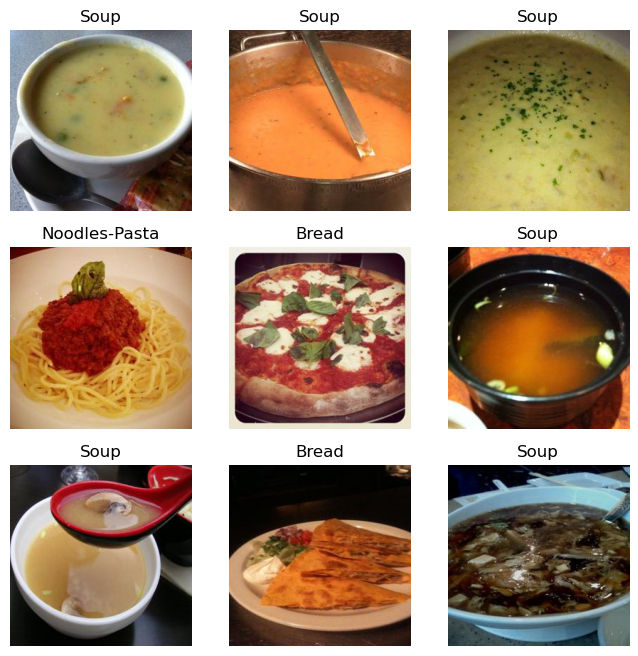

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset After Pre-Processing


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).





################################################





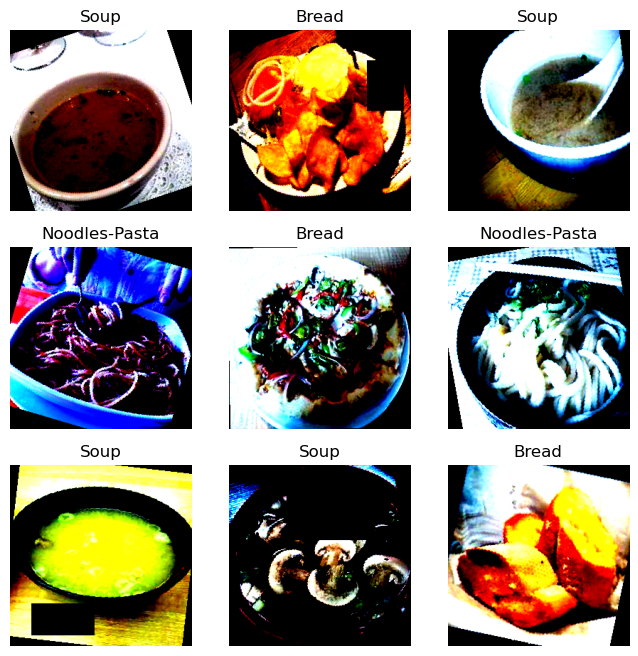

In [6]:
path="C:\\Users\\Administrator\\Desktop\\datasets\\dataset-3"
batch_size=32
inputDimension=(256,256)
data_loader(path,batch_size,inputDimension,flag=1)

In [7]:
def train(num_epochsGiven, model, train_loader, criterion, optimizer,val_loader):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print("Device: {}".format(device))
  model.to(device)
  Accuracy=[]
  validAccuracy=[]
  stepAccuracyTotal=[]
  stepAccuracyValidationTotal=[]
  stepLossTotal=[]
  Loss = []
  num_epochs = num_epochsGiven
  total_steps = len(train_loader)
  t1 = time.time()
  total,correct,loss=0,0,0
  for epoch in range(num_epochs):
      stepAcc=[]
      stepLoss=[]    
      for i, data in enumerate(train_loader):
          images, labels = data[0].to(device), data[1].to(device)
          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          # Backprop and optimisation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          # Train accuracy
          total = labels.size(0)
          _,predicted = torch.max(outputs.data, 1)
          correct = (predicted == labels).sum().item()
          stepAcc.append((correct / total) * 100)
          stepLoss.append(loss.item())
          if (i + 1) % 30 == 0:
              stepAccuracyTotal.append((correct / total) * 100)
              stepLossTotal.append(loss.item())
              correct_v = 0
              total_v = 0
              for dataVal in val_loader:
                  images_v, labels_v = dataVal[0].to(device), dataVal[1].to(device)
                  outputs = model(images_v)
                  _, predicted = torch.max(outputs.data, 1)
                  correct_v += (predicted == labels_v).sum().item()
                  total_v += labels_v.size(0) 
              stepAccuracyValidationTotal.append((correct_v / total_v) * 100)
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%,Validation Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100,(correct_v / total_v) * 100))     
      correct_v = 0
      total_v = 0
      for dataVal in val_loader:
          images_v, labels_v = dataVal[0].to(device), dataVal[1].to(device)
          outputs = model(images_v)
          _, predicted = torch.max(outputs.data, 1)
          correct_v += (predicted == labels_v).sum().item()
          total_v += labels_v.size(0)        
      Accuracy.append(sum(stepAcc)/len(stepAcc))
      validAccuracy.append((correct_v / total_v) * 100)
      Loss.append(sum(stepLoss)/len(stepLoss))
  endTime =  time.time()
  print("######## Training Finished in {} seconds ###########".format(endTime-t1))
  print("######## Training timer per epoch is {} seconds ###########".format((endTime-t1)/num_epochsGiven))
  return Loss,Accuracy,model,validAccuracy,stepAccuracyTotal,stepAccuracyValidationTotal,stepLossTotal

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
def test(model, device, test_loader):
  model.eval() 
  y_truth=[]
  y_predicted=[]
  cm=[]
  with torch.no_grad(): 
      correct = 0
      total = 0
      for data in test_loader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          #print(predicted,labels)
          correct += (predicted == labels).sum().item()
          y_truth+=labels.cpu().numpy().tolist()
          y_predicted+=predicted.cpu().numpy().tolist()
      print('Test Accuracy of the model on the {} test images: {} %'.format(total, (correct / total) * 100))
      cm= confusion_matrix(y_truth,y_predicted)
  print(classification_report(y_truth,y_predicted))
  return cm


Learning Rate: 0.0001 Batch Size: 64  Loss function:  Cross Entropy Loss  Optimizer:  Adam Optimizer
Train Datset Size After Split 2372
Test Datset Size After Split 271
Validation Datset Size After Split 291
Device: cuda
Epoch [1/15], Step [30/38], Loss: 0.9129, Accuracy: 56.25%,Validation Accuracy: 50.86%
Epoch [2/15], Step [30/38], Loss: 0.8530, Accuracy: 54.69%,Validation Accuracy: 61.86%
Epoch [3/15], Step [30/38], Loss: 0.7847, Accuracy: 65.62%,Validation Accuracy: 62.89%
Epoch [4/15], Step [30/38], Loss: 0.5980, Accuracy: 67.19%,Validation Accuracy: 64.26%
Epoch [5/15], Step [30/38], Loss: 0.7607, Accuracy: 68.75%,Validation Accuracy: 71.48%
Epoch [6/15], Step [30/38], Loss: 0.7114, Accuracy: 62.50%,Validation Accuracy: 70.10%
Epoch [7/15], Step [30/38], Loss: 0.6086, Accuracy: 71.88%,Validation Accuracy: 76.98%
Epoch [8/15], Step [30/38], Loss: 0.6576, Accuracy: 75.00%,Validation Accuracy: 77.66%
Epoch [9/15], Step [30/38], Loss: 0.8335, Accuracy: 57.81%,Validation Accuracy: 78.

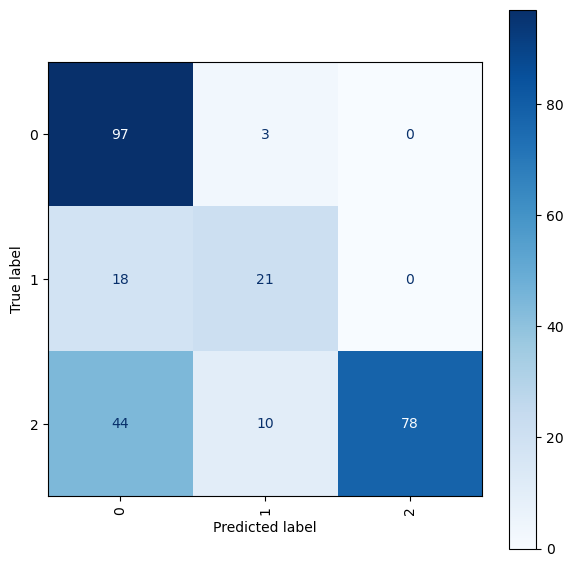

Learning Rate: 0.0001 Batch Size: 32  Loss function:  Cross Entropy Loss  Optimizer:  Adam Optimizer
Train Datset Size After Split 2372
Test Datset Size After Split 271
Validation Datset Size After Split 291
Device: cuda
Epoch [1/15], Step [30/75], Loss: 0.9883, Accuracy: 56.25%,Validation Accuracy: 50.86%
Epoch [1/15], Step [60/75], Loss: 0.9114, Accuracy: 43.75%,Validation Accuracy: 51.20%
Epoch [2/15], Step [30/75], Loss: 0.8073, Accuracy: 68.75%,Validation Accuracy: 62.20%
Epoch [2/15], Step [60/75], Loss: 0.8634, Accuracy: 56.25%,Validation Accuracy: 60.14%
Epoch [3/15], Step [30/75], Loss: 0.5804, Accuracy: 75.00%,Validation Accuracy: 62.89%
Epoch [3/15], Step [60/75], Loss: 0.7201, Accuracy: 68.75%,Validation Accuracy: 65.98%
Epoch [4/15], Step [30/75], Loss: 0.7383, Accuracy: 62.50%,Validation Accuracy: 67.35%
Epoch [4/15], Step [60/75], Loss: 0.7203, Accuracy: 62.50%,Validation Accuracy: 74.91%
Epoch [5/15], Step [30/75], Loss: 0.6549, Accuracy: 65.62%,Validation Accuracy: 72.

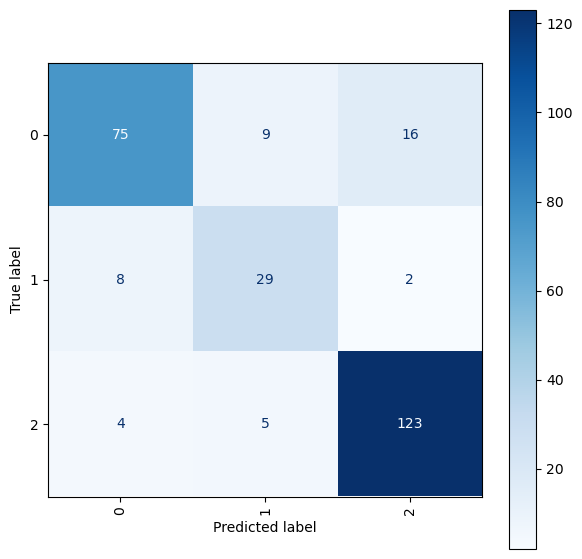

Learning Rate: 0.001 Batch Size: 64  Loss function:  Cross Entropy Loss  Optimizer:  Adam Optimizer
Train Datset Size After Split 2372
Test Datset Size After Split 271
Validation Datset Size After Split 291
Device: cuda
Epoch [1/15], Step [30/38], Loss: 1.0093, Accuracy: 46.88%,Validation Accuracy: 50.86%
Epoch [2/15], Step [30/38], Loss: 1.0930, Accuracy: 42.19%,Validation Accuracy: 50.86%
Epoch [3/15], Step [30/38], Loss: 0.9235, Accuracy: 59.38%,Validation Accuracy: 50.86%
Epoch [4/15], Step [30/38], Loss: 1.0630, Accuracy: 45.31%,Validation Accuracy: 50.86%
Epoch [5/15], Step [30/38], Loss: 0.8578, Accuracy: 59.38%,Validation Accuracy: 50.86%
Epoch [6/15], Step [30/38], Loss: 1.0250, Accuracy: 48.44%,Validation Accuracy: 50.86%
Epoch [7/15], Step [30/38], Loss: 1.0477, Accuracy: 50.00%,Validation Accuracy: 51.20%
Epoch [8/15], Step [30/38], Loss: 1.0224, Accuracy: 39.06%,Validation Accuracy: 55.33%
Epoch [9/15], Step [30/38], Loss: 0.8960, Accuracy: 67.19%,Validation Accuracy: 58.7

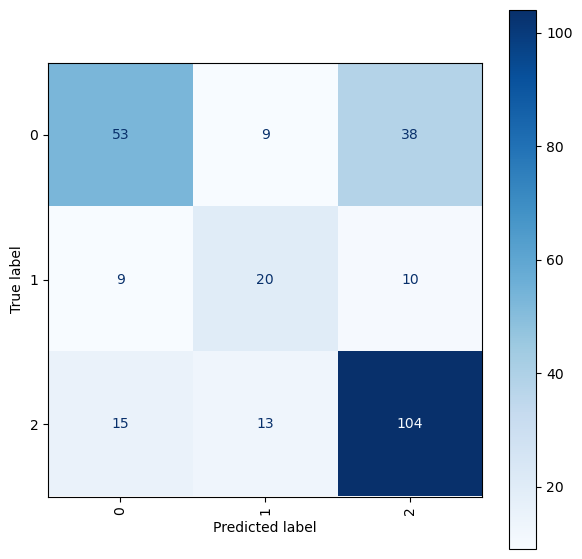

Learning Rate: 0.001 Batch Size: 32  Loss function:  Cross Entropy Loss  Optimizer:  Adam Optimizer
Train Datset Size After Split 2372
Test Datset Size After Split 271
Validation Datset Size After Split 291
Device: cuda
Epoch [1/15], Step [30/75], Loss: 1.0159, Accuracy: 56.25%,Validation Accuracy: 50.86%
Epoch [1/15], Step [60/75], Loss: 1.0149, Accuracy: 50.00%,Validation Accuracy: 50.86%
Epoch [2/15], Step [30/75], Loss: 1.0131, Accuracy: 53.12%,Validation Accuracy: 50.52%
Epoch [2/15], Step [60/75], Loss: 1.0448, Accuracy: 37.50%,Validation Accuracy: 50.86%
Epoch [3/15], Step [30/75], Loss: 1.0950, Accuracy: 46.88%,Validation Accuracy: 50.86%
Epoch [3/15], Step [60/75], Loss: 1.0145, Accuracy: 43.75%,Validation Accuracy: 50.86%
Epoch [4/15], Step [30/75], Loss: 0.9121, Accuracy: 62.50%,Validation Accuracy: 50.86%
Epoch [4/15], Step [60/75], Loss: 0.9992, Accuracy: 53.12%,Validation Accuracy: 50.86%
Epoch [5/15], Step [30/75], Loss: 0.8629, Accuracy: 59.38%,Validation Accuracy: 50.8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


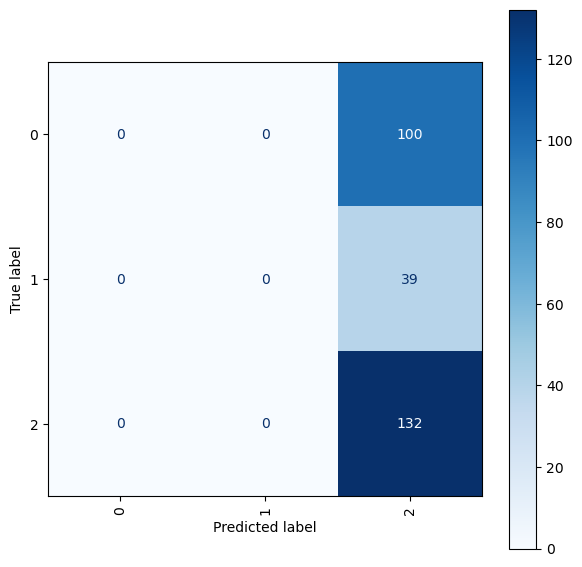

In [9]:
MODELS=[]
hyper_parameters = []
train_acc_hyper_paramaters=[]
train_acc_valid_hyper_paramaters=[]
train_loss_hyper_paramaters=[]

train_acc_hyper_paramaters_step=[]
train_acc_valid_hyper_paramaters_step=[]
train_loss_hyper_paramaters_step=[]



batch_sizes=[64,32]
learning_rates=[0.0001,.001]
epochs=15


for learning_rate in learning_rates:
    for batch_size in batch_sizes:
      model3 = models.alexnet(weights=None)
      model3.classifier[6] = nn.Linear(4096,3)

      stringCrit="Cross Entropy Loss"
      criterion=nn.CrossEntropyLoss()
      #Optimizer Function 
      stringOPTM="Adam Optimizer"
      optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)

      hyper_parameters.append(["Learning Rate: "+str(learning_rate)+" Batch Size: "+str(batch_size),stringCrit,stringOPTM])
      print("Learning Rate: "+str(learning_rate)+" Batch Size: "+str(batch_size)," Loss function: ",stringCrit," Optimizer: ",stringOPTM)
      
      train_loader, test_loader, val_loader = data_loader(path,batch_size, inputDimension)
      tempLoss,tempAccuracy,tempModel,tempValidAccuracy,tempStepAccuracy,tempStepValidation,tempStepLoss = train(epochs,model3,train_loader,criterion,optimizer,val_loader)

      
      train_loss_hyper_paramaters.append(tempLoss)
      train_acc_hyper_paramaters.append(tempAccuracy)
      train_acc_valid_hyper_paramaters.append(tempValidAccuracy)

      train_acc_valid_hyper_paramaters_step.append(tempStepValidation)      
      train_acc_hyper_paramaters_step.append(tempStepAccuracy)
      train_loss_hyper_paramaters_step.append(tempStepLoss)

      cmReturned = test(model3,"cuda",test_loader)
      if cmReturned is not None:
          fig, ax = plt.subplots(figsize=(7, 7))
          ConfusionMatrixDisplay(cmReturned).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
          plt.show()   
      MODELS.append(tempModel)
  

In [10]:
num_epochs = [(i+1) for i in range(epochs)]

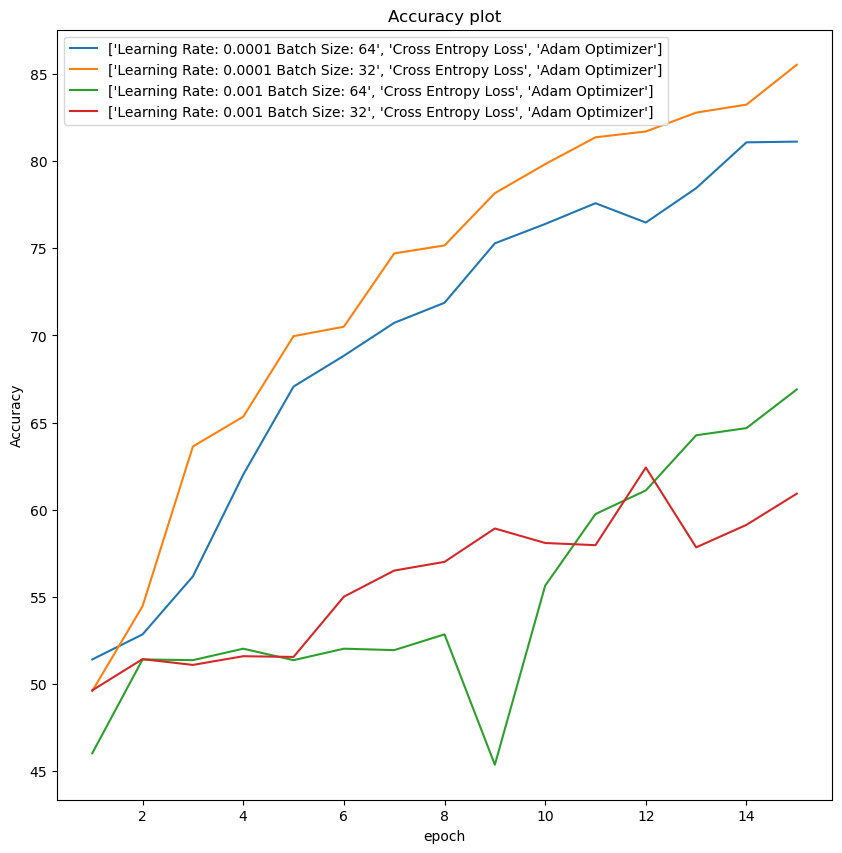

In [39]:
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')


for i in range(len(hyper_parameters)):
    plt.plot(num_epochs,train_acc_hyper_paramaters[i],label=hyper_parameters[i])
plt.legend()

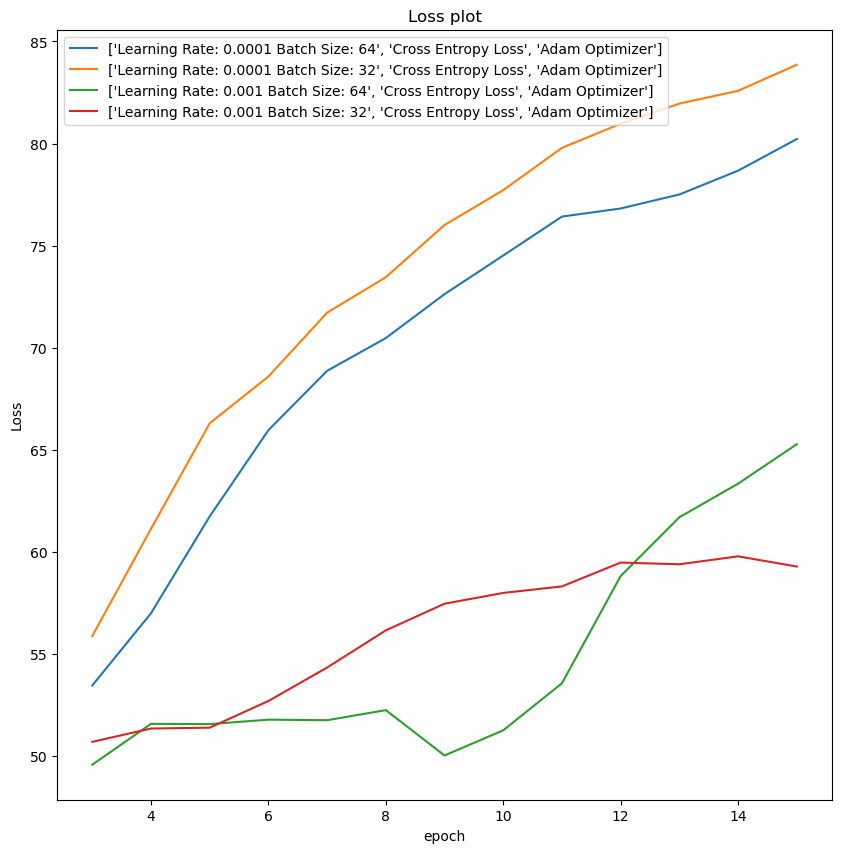

In [40]:
import numpy as np

epochs = 15
num_epochs = [(i+1) for i in range(epochs)]
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

window_size = 3  # choose the window size for smoothing

for i in range(len(hyper_parameters)):
    accuracy = train_acc_hyper_paramaters[i]
    smoothed_accuracy = np.convolve(accuracy, np.ones(window_size)/window_size, mode='valid')
    plt.plot(num_epochs[-len(smoothed_accuracy):], smoothed_accuracy, label=hyper_parameters[i])
plt.legend()

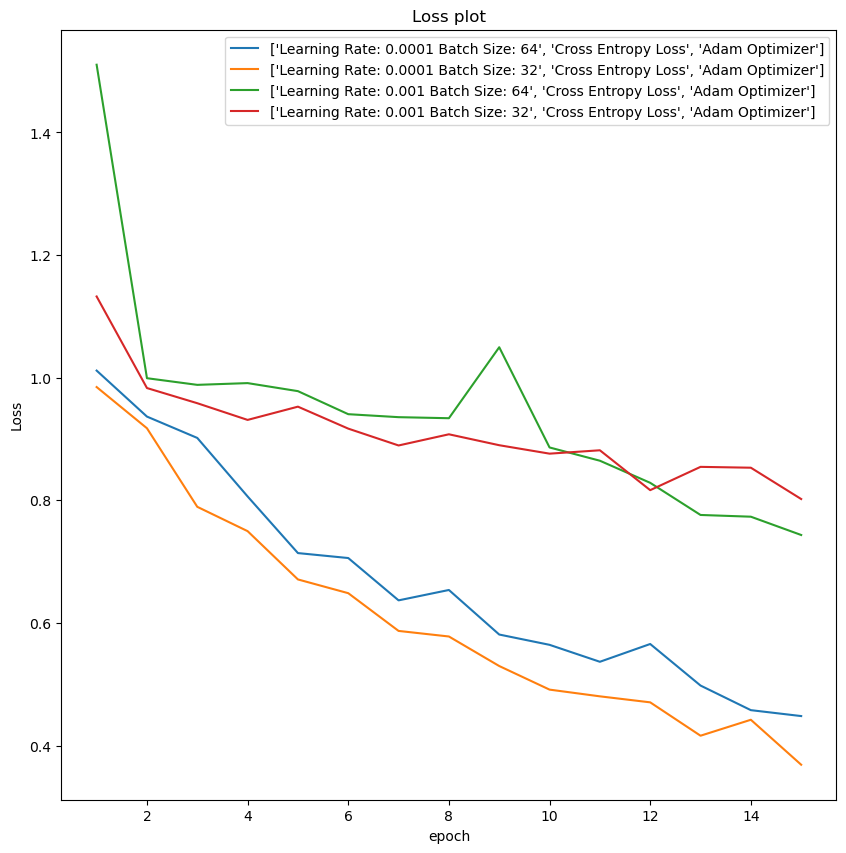

In [41]:
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')


for i in range(len(hyper_parameters)):
    plt.plot(num_epochs,train_loss_hyper_paramaters[i],label=hyper_parameters[i])
plt.legend()

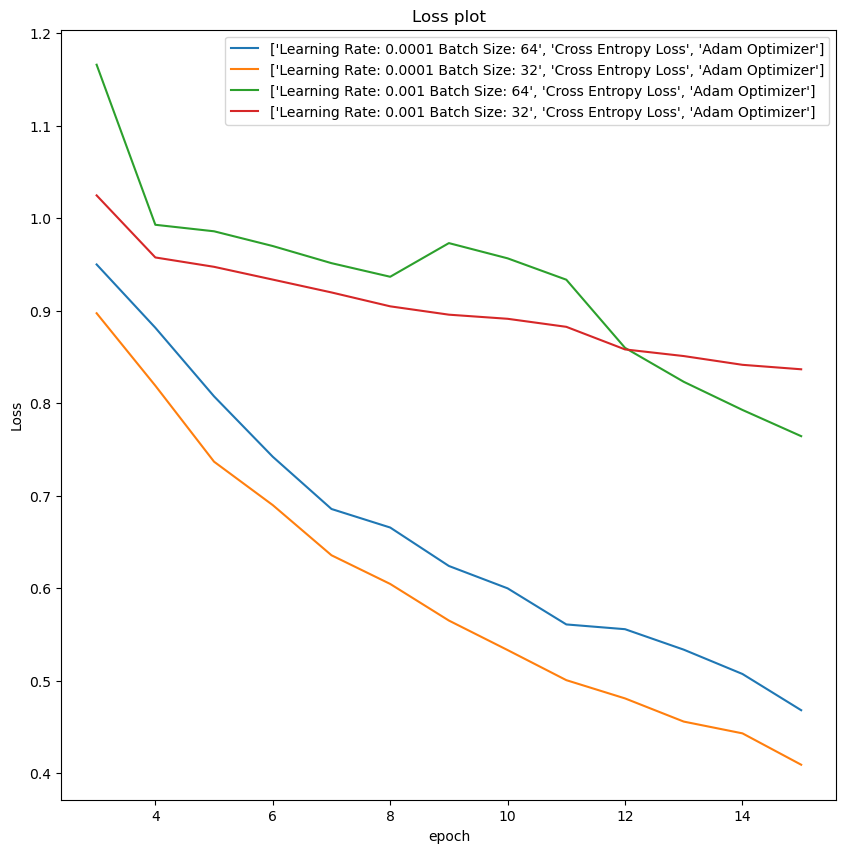

In [42]:
import numpy as np

epochs = 15
num_epochs = [(i+1) for i in range(epochs)]
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

window_size = 3  # choose the window size for smoothing

for i in range(len(hyper_parameters)):
    losses = train_loss_hyper_paramaters[i]
    smoothed_losses = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')
    plt.plot(num_epochs[-len(smoothed_losses):], smoothed_losses, label=hyper_parameters[i])
    
plt.legend()

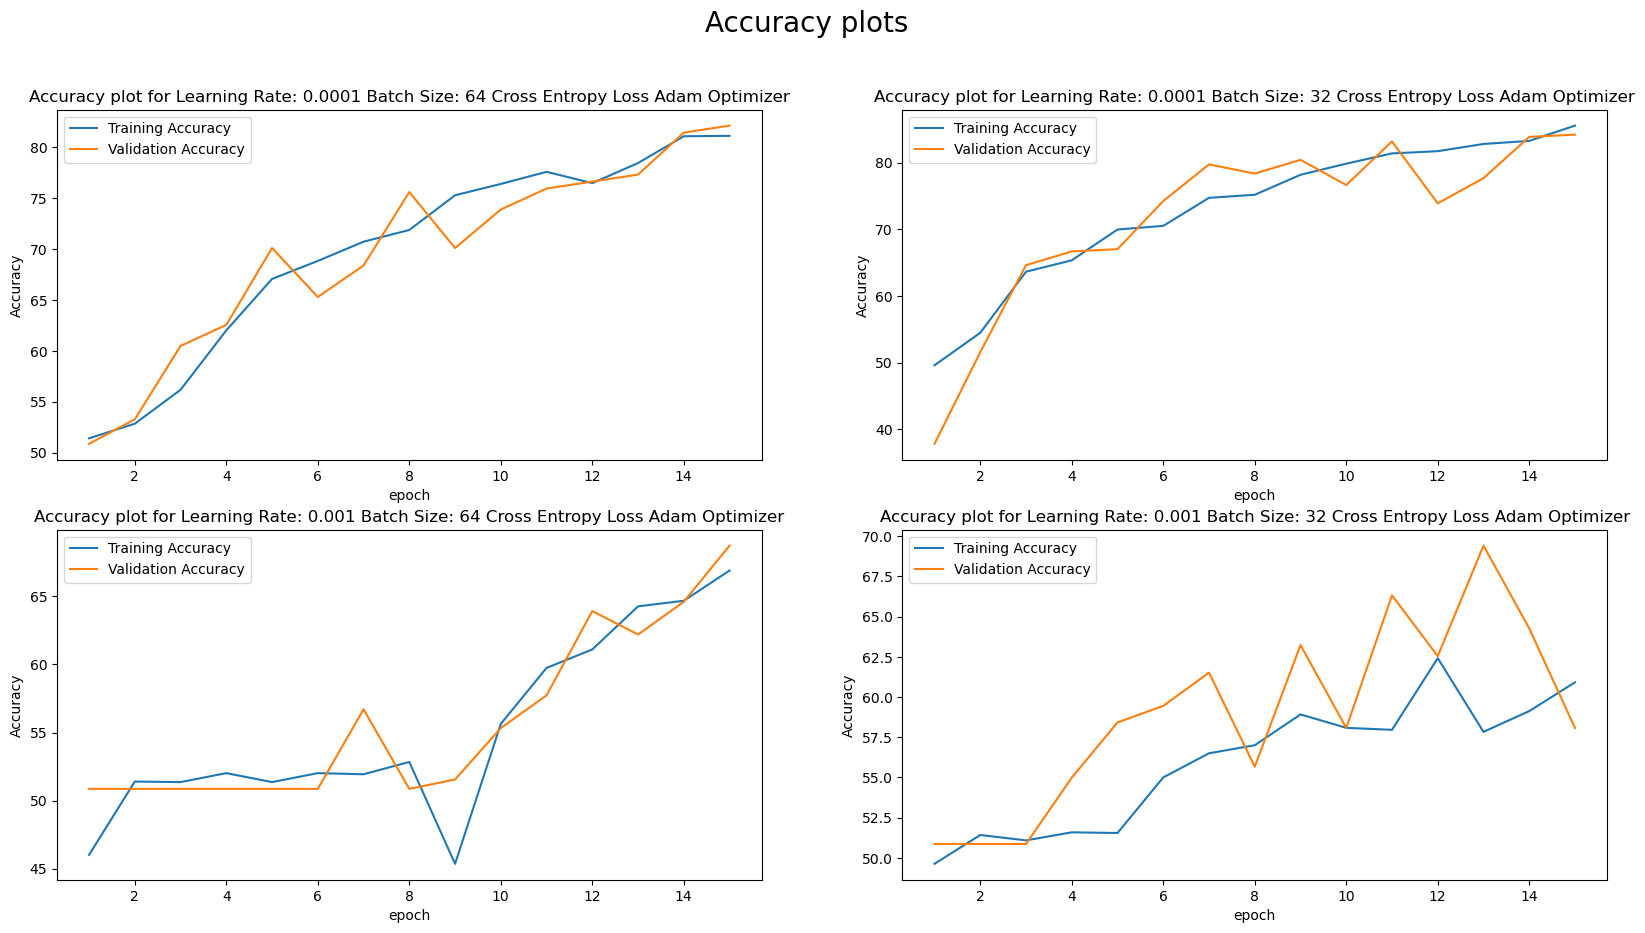

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Accuracy plots', fontsize=20)

for i in range(len(hyper_parameters)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(num_epochs, train_acc_hyper_paramaters[i], label="Training Accuracy")
    axs[row, col].plot(num_epochs, train_acc_valid_hyper_paramaters[i],label="Validation Accuracy")
    axs[row, col].set_xlabel('epoch')
    axs[row, col].set_ylabel('Accuracy')
    axs[row, col].set_title('Accuracy plot for ' + " ".join(hyper_parameters[i]))
    axs[row, col].legend()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

num_epochs = [(i+1) for i in range(epochs)]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Accuracy plots', fontsize=20)

for i in range(len(hyper_parameters)):
    row = i // 2
    col = i % 2

    # Smooth the training accuracy curve
    train_acc_smooth = savgol_filter(train_acc_hyper_paramaters[i], window_length=11, polyorder=3)
    axs[row, col].plot(num_epochs, train_acc_smooth, label="Training Accuracy")

    # Smooth the validation accuracy curve
    val_acc_smooth = savgol_filter(train_acc_valid_hyper_paramaters[i], window_length=11, polyorder=3)
    axs[row, col].plot(num_epochs, val_acc_smooth, label="Validation Accuracy")

    axs[row, col].set_xlabel('epoch')
    axs[row, col].set_ylabel('Accuracy')
    axs[row, col].set_title('Accuracy plot for ' + " ".join(hyper_parameters[i]))
    axs[row, col].legend()

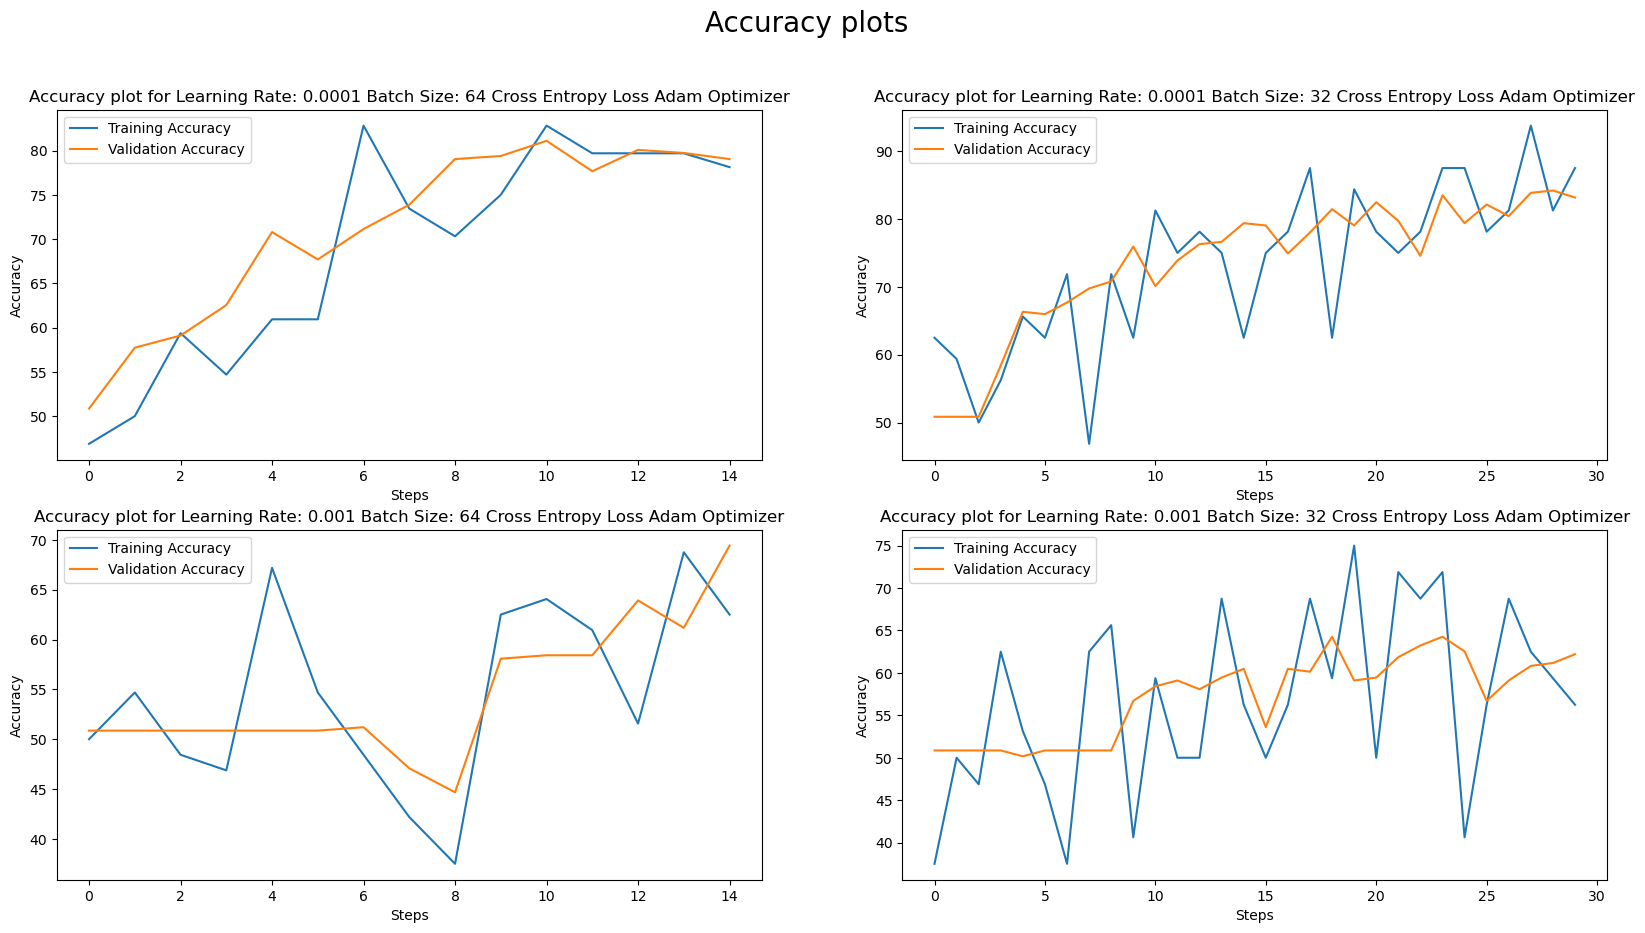

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Accuracy plots', fontsize=20)

for i in range(len(hyper_parameters)):
    row = i // 2
    col = i % 2
    axs[row, col].plot( train_acc_hyper_paramaters_step[i], label="Training Accuracy")
    axs[row, col].plot(train_acc_valid_hyper_paramaters_step[i],label="Validation Accuracy")
    axs[row, col].set_xlabel('Steps')
    axs[row, col].set_ylabel('Accuracy')
    axs[row, col].set_title('Accuracy plot for ' + " ".join(hyper_parameters[i]))
    axs[row, col].legend()

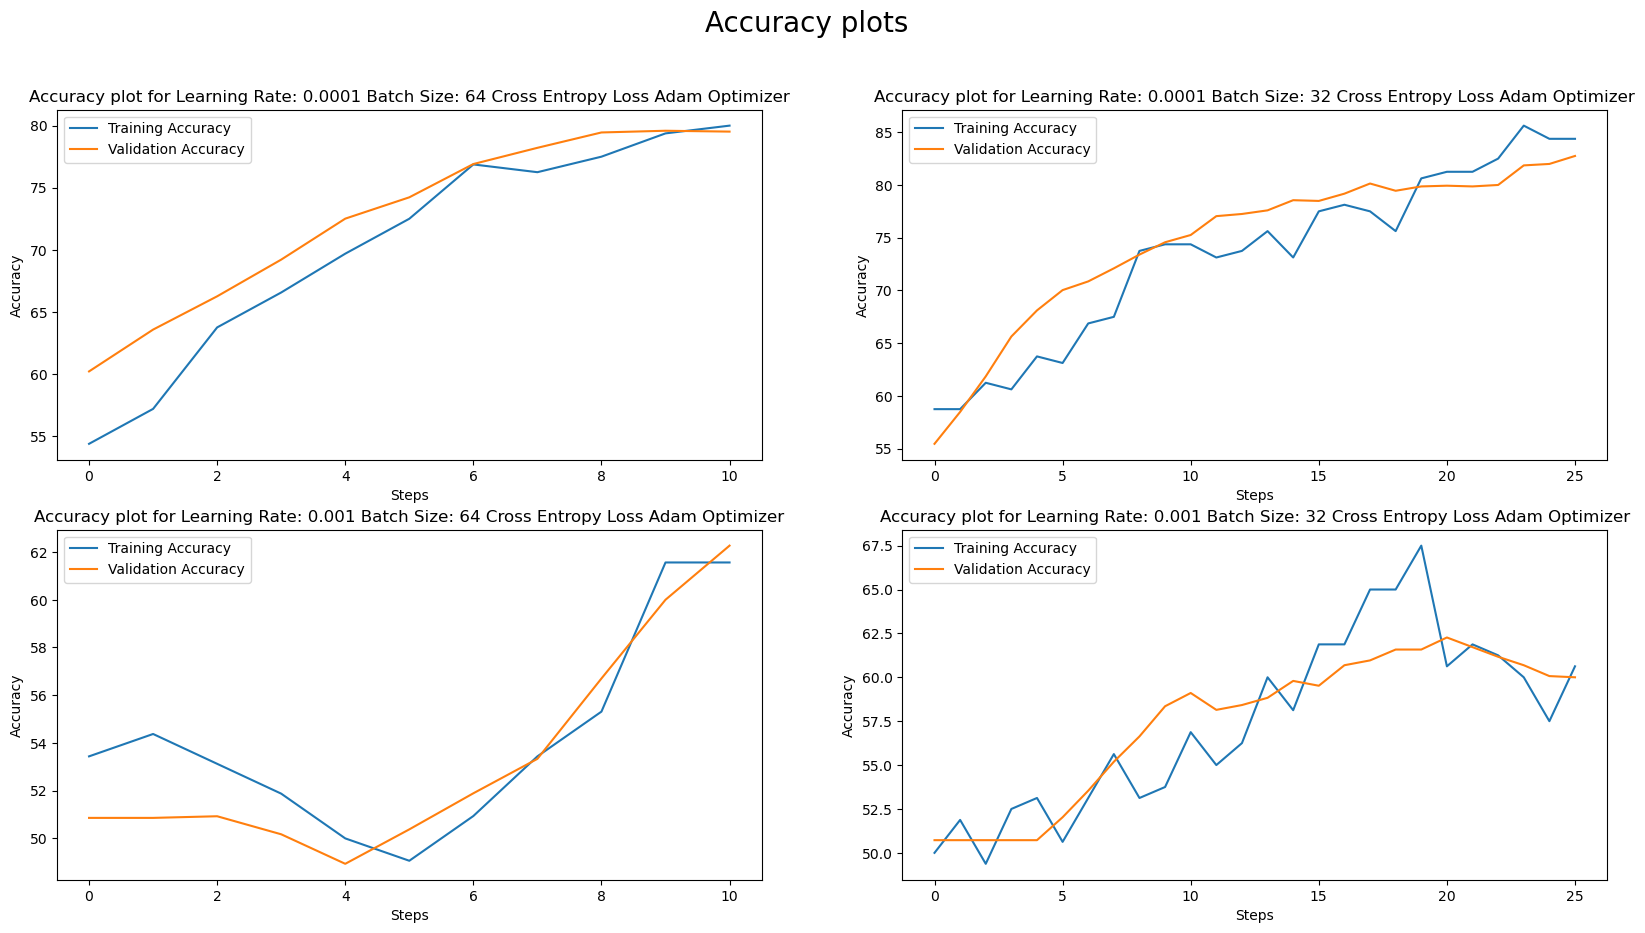

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute the moving average of a list
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Plot the accuracy graphs
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Accuracy plots', fontsize=20)

for i in range(len(hyper_parameters)):
    row = i // 2
    col = i % 2
   
    # Compute the moving average of the training and validation accuracy
    train_acc_smooth = moving_average(train_acc_hyper_paramaters_step[i], 5)
    valid_acc_smooth = moving_average(train_acc_valid_hyper_paramaters_step[i], 5)
   
    # Plot the smoothed accuracy curves
    axs[row, col].plot(train_acc_smooth, label="Training Accuracy")
    axs[row, col].plot(valid_acc_smooth, label="Validation Accuracy")
   
    axs[row, col].set_xlabel('Steps')
    axs[row, col].set_ylabel('Accuracy')
    axs[row, col].set_title('Accuracy plot for ' + " ".join(hyper_parameters[i]))
    axs[row, col].legend()

plt.show()

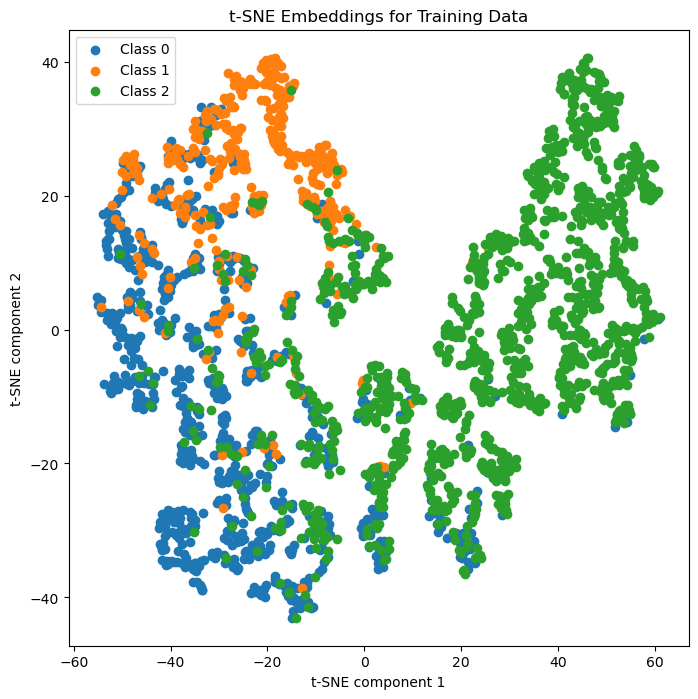

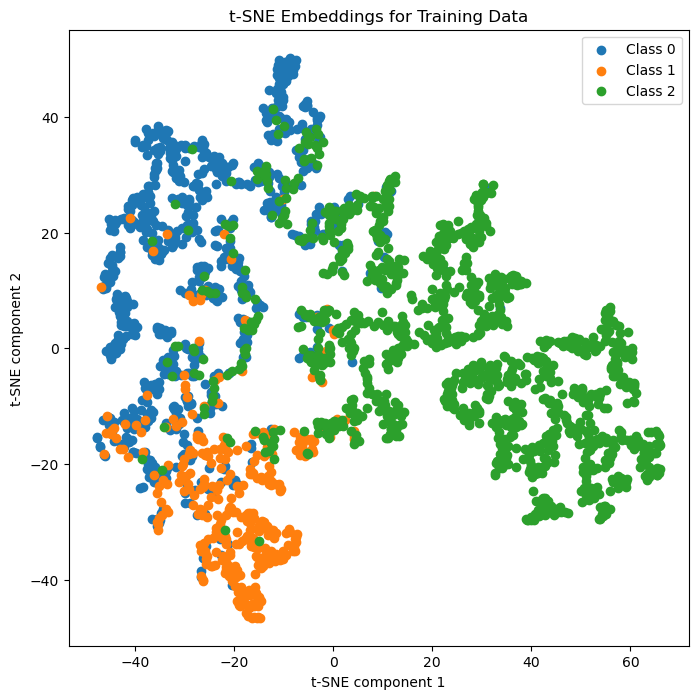

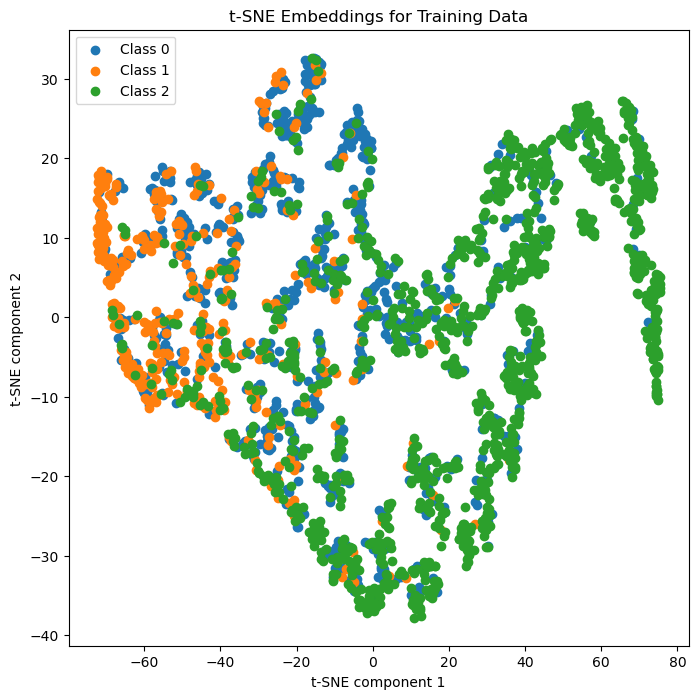

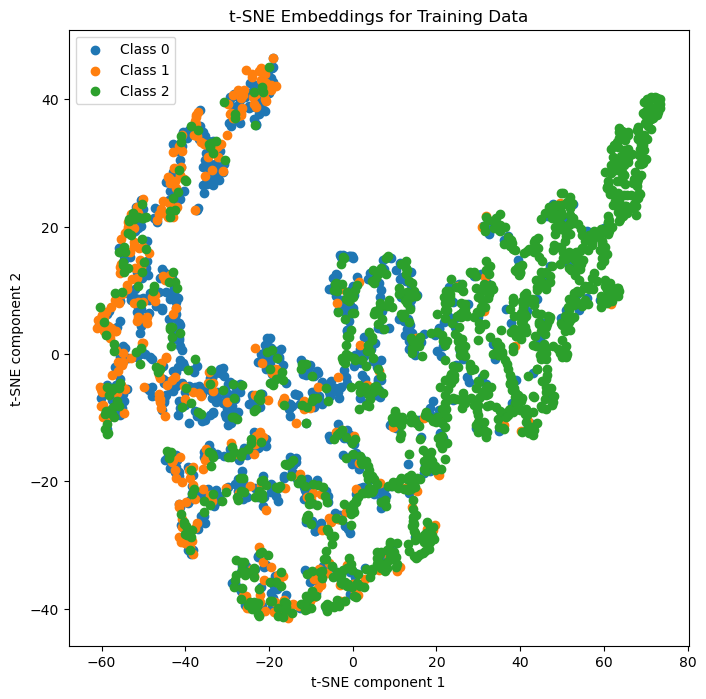

In [46]:
from sklearn.manifold import TSNE
for temporaryModel in MODELS:
  
  # Get embeddings for the training data
  embeddings = []
  labels = []
  with torch.no_grad():
      for data in train_loader:
          images, targets = data[0].to(device), data[1].to(device)
          outputs = temporaryModel(images)
          embeddings.append(outputs.cpu().numpy())
          labels.append(targets.cpu().numpy())
  embeddings = np.concatenate(embeddings)
  labels = np.concatenate(labels)

  # Apply t-SNE for visualization
  tsne = TSNE(n_components=2, perplexity=30, random_state=0)
  embeddings_tsne = tsne.fit_transform(embeddings)

  # Plot t-SNE embeddings
  plt.figure(figsize=(8,8))
  for i in range(3):
      plt.scatter(embeddings_tsne[labels==i,0], embeddings_tsne[labels==i,1], label=f'Class {i}')
  plt.legend()
  plt.title('t-SNE Embeddings for Training Data')
  plt.xlabel("t-SNE component 1")
  plt.ylabel("t-SNE component 2")
  plt.show()

In [ ]:
i=1
for model in MODELS:
  torch.save(model, "/content/VGG11_Dataset3_Model"+str(i)+".pt")
  i=i+1

In [ ]:
TempTransformer = transforms.Compose([
    transforms.Resize(inputDimension),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
    transforms.RandomErasing()
  ])




from PIL import Image
imageInput = Image.open('C:\\Users\\Administrator\\Desktop\\datasets\\dataset-3\\train\\Bread\\108.jpg')
input_data = TempTransformer(imageInput)
input_data = input_data.to(device)
input_data = input_data.unsqueeze(0)
i=0
for tempModelList in MODELS:
  tempModelList.eval()
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  tempModelList.to(device)
  print(" ".join(hyper_parameters[i]))
  with torch.no_grad():
    output = tempModelList(input_data)

  out=output.tolist()[0]
  print(labels_map[out.index(max(out))])
  i=i+1